# **Personal Project**



---

*   Examine and select an open dataset from Kaggle
*   Read dataset in using Pandas and google sheets
* Look up and change data types
* Investigate patterns in the data
* Create features (feature engineering)
* Test different machine learning algorithms
* Evaluate how well the algorithms work 

---

# **Visualizing Data**

---



In [ ]:
# Connecting your google drive with colab so you can access data from spreadsheets
# You will need to run this code and enter a key to authenticate every day/session
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

ApplicationDefaultCredentialsError: ignored

In [ ]:
# Import the python packages we want to use
# Pandas helps us explore and manipulate the data
# Matplotlib helps us to graph and plot the data
import pandas as pd
import matplotlib.pyplot as plt


---

dataset:

*   World Happiness Report 2019: https://www.kaggle.com/unsdsn/world-happiness


In [ ]:
# World Happiness Report 2019 data
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1bwIXIzmE77O1Gsmp3_H3vveAExYyZ17mkGagq-4PNtY/edit#gid=906238556')

NameError: ignored

In [ ]:
# Import your data into a Pandas data frame
# You may have to change the name of the sheet to match the sheet you are pulling from your spreadsheet - pay attention to capitalization!
sheet = wb.worksheet('data') #change this sheet name for a new dataset
data = sheet.get_all_values()

# Pandas stores data in a 'data frame'
df = pd.DataFrame(data)

# Set the headings
df.columns = df.iloc[0]
df = df.iloc[1:]

# Print the first few lines of the data frame to check that everything looks good
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
1,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393
2,2,Denmark,7.6,1.383,1.573,0.996,0.592,0.252,0.41
3,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Iceland,7.494,1.38,1.624,1.026,0.591,0.354,0.118
5,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
# Check the data types in your data frame. Are they all correct? 
# Usually pandas imports everything as an object, which means you will need to tell is which data type each column should be.
# You should do this so you can do math with data that includes numbers, etc.

df.dtypes

0
Overall rank                    object
Country or region               object
Score                           object
GDP per capita                  object
Social support                  object
Healthy life expectancy         object
Freedom to make life choices    object
Generosity                      object
Perceptions of corruption       object
dtype: object



---



---


More information about data types in pandas, and the options for data types: https://pbpython.com/pandas_dtypes.html


---





---


Manipulate the data before giving it a type. There are multiple ways to convert this data. Things to consider: why you would use this data? Do you only need the Rank? Do you need all the information in the Generosity column?


---



If the dataset has missing data, you'll have to decide what to do with the missing values. Information on what you can do in pandas with missing data: https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/

In [ ]:
# World Happiness 2019 data
new_df = {
    'Rank': df['Overall rank'].astype(int),
    'Country': df['Country or region'].astype(str),
    'Score': df['Score'].astype(float),
    'GDP': df['GDP per capita'].astype(float),
    'SocialSupport': df['Social support'].astype(float),
    'Health': df['Healthy life expectancy'].astype(float),
    'Freedom': df['Freedom to make life choices'].astype(float),
    'Generosity': df['Generosity'].astype(float),
    'Corruption': df['Perceptions of corruption'].astype(float)
}

In [ ]:
# Now let's look at the goodreads data again
# print(new_df)
# print(df)
happy_df = pd.DataFrame(new_df)
happy_df.head()

,Rank,Country,Score,GDP,SocialSupport,Health,Freedom,Generosity,Corruption
1,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
# And check to make sure all our data types are correct
happy_df.dtypes

Rank               int64
Country           object
Score            float64
GDP              float64
SocialSupport    float64
Health           float64
Freedom          float64
Generosity       float64
Corruption       float64
dtype: object



---


Next,  explore the data. What are some patterns we can observe? These patterns might help us decide what types of data to use in machine learning later.

Use the column name inside the brackets, and try using 'describe' to understand the dataset. Some examples from the goodreads set are below. Notice how the same code - 'describe' - has different output when the data type is different.


---
Read more about grouping and exploring the data here: https://realpython.com/pandas-python-explore-dataset/  

and here: https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas


---



---




In [ ]:
print(happy_df['GDP'].mode())
happy_df['GDP'].describe()


0    0.96
dtype: float64


count    156.000000
mean       0.905147
std        0.398389
min        0.000000
25%        0.602750
50%        0.960000
75%        1.232500
max        1.684000
Name: GDP, dtype: float64

In [ ]:
print(happy_df['SocialSupport'].mode())

happy_df['SocialSupport'].describe()

0    1.465
dtype: float64


count    156.000000
mean       1.208814
std        0.299191
min        0.000000
25%        1.055750
50%        1.271500
75%        1.452500
max        1.624000
Name: SocialSupport, dtype: float64

In [ ]:
print(happy_df['Health'].mode())

happy_df['Health'].describe()

0    0.815
1    0.999
dtype: float64


count    156.000000
mean       0.725244
std        0.242124
min        0.000000
25%        0.547750
50%        0.789000
75%        0.881750
max        1.141000
Name: Health, dtype: float64

In [ ]:
print(happy_df['Freedom'].mode())

happy_df['Freedom'].describe()

0    0.498
1    0.508
2    0.557
dtype: float64


count    156.000000
mean       0.392571
std        0.143289
min        0.000000
25%        0.308000
50%        0.417000
75%        0.507250
max        0.631000
Name: Freedom, dtype: float64

In [ ]:
happy_df['Score'].describe()

count    156.000000
mean       5.407096
std        1.113120
min        2.853000
25%        4.544500
50%        5.379500
75%        6.184500
max        7.769000
Name: Score, dtype: float64

In [ ]:
happy_df['Generosity'].describe()

count    156.000000
mean       0.184846
std        0.095254
min        0.000000
25%        0.108750
50%        0.177500
75%        0.248250
max        0.566000
Name: Generosity, dtype: float64



---


Can also use matplotlib to make some graphs. Read more about how 

here: https://ourcodingclub.github.io/tutorials/pandas-python-intro/#matplotlib 

and here: https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot


---



---



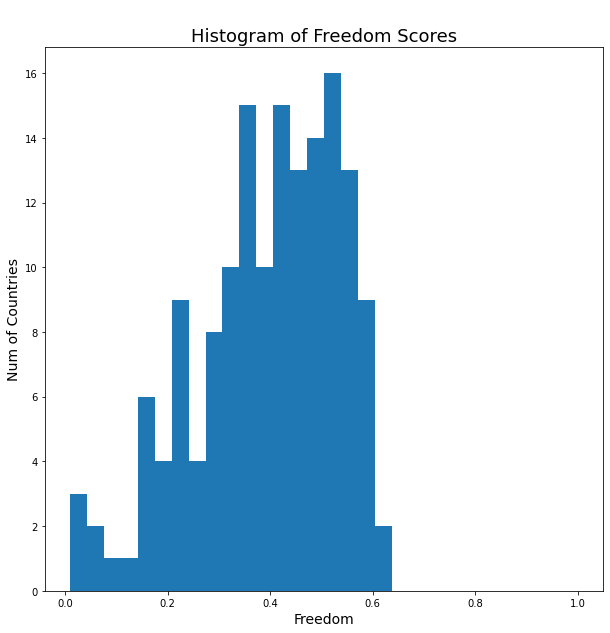

In [ ]:
plt.figure(figsize=(10,10))
plt.hist(happy_df['Freedom'], bins=30, range=(0.01, 1))
plt.title('\nHistogram of Freedom Scores', fontsize=18)
plt.ylabel('Num of Countries', fontsize=14)
plt.xlabel('Freedom', fontsize=14)
plt.show()

In [ ]:
happy_df['Corruption'].describe()

count    156.000000
mean       0.110603
std        0.094538
min        0.000000
25%        0.047000
50%        0.085500
75%        0.141250
max        0.453000
Name: Corruption, dtype: float64

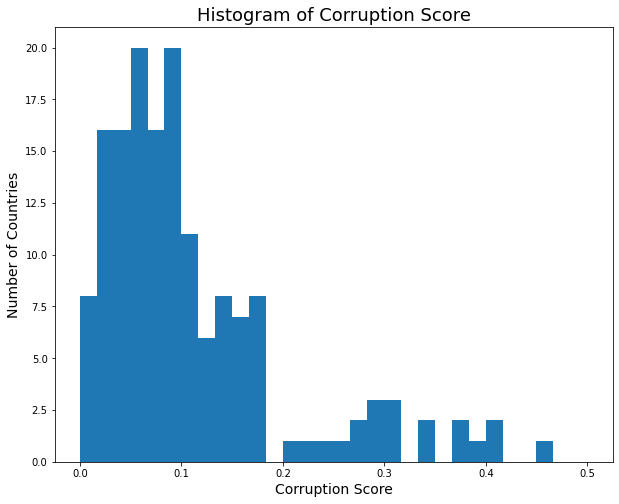

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(happy_df['Corruption'], bins=30,range=(0,0.5)) # Set the highest page number at 2000. There are some books with more pages, but they're outliers.
plt.title('Histogram of Corruption Score', fontsize=18)
plt.ylabel('Number of Countries', fontsize=14)
plt.xlabel('Corruption Score', fontsize=14)
plt.show()

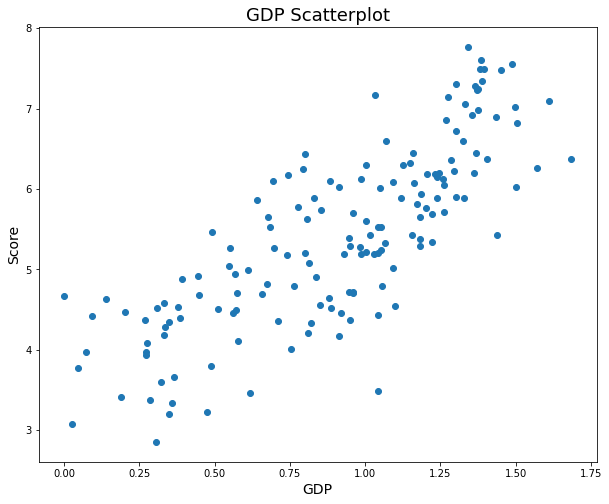

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(happy_df['GDP'], happy_df['Score']) # Set the highest page number at 2000. There are some books with more pages, but they're outliers.
plt.title('GDP Scatterplot', fontsize=18)
plt.ylabel('Score', fontsize=14)
plt.xlabel('GDP', fontsize=14)
plt.show()

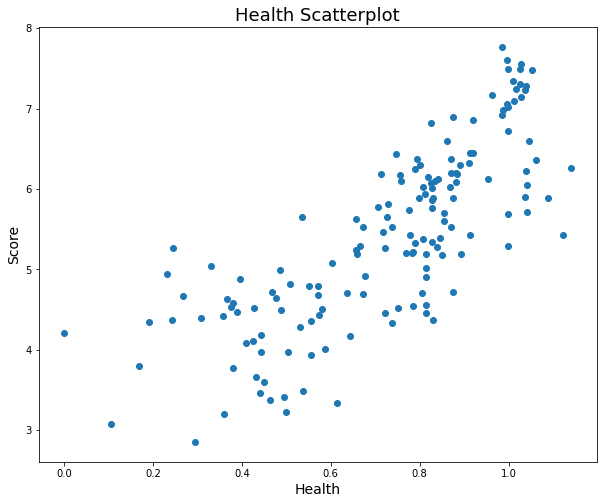

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(happy_df['Health'], happy_df['Score']) # Set the highest page number at 2000. There are some books with more pages, but they're outliers.
plt.title('Health Scatterplot', fontsize=18)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Health', fontsize=14)
plt.show()

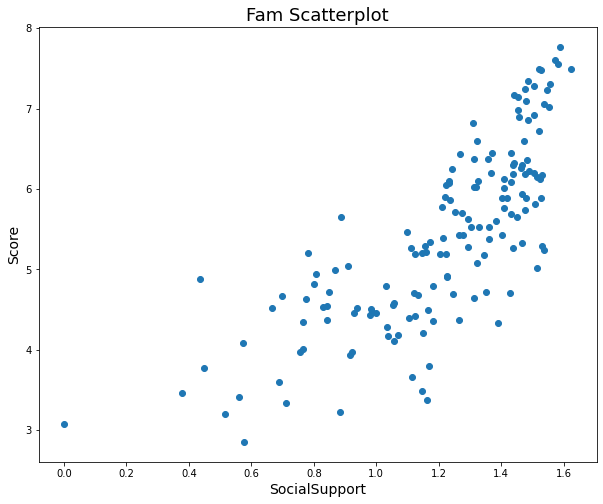

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(happy_df['SocialSupport'], happy_df['Score']) # Set the highest page number at 2000. There are some books with more pages, but they're outliers.
plt.title('Fam Scatterplot', fontsize=18)
plt.ylabel('Score', fontsize=14)
plt.xlabel('SocialSupport', fontsize=14)
plt.show()

In [1]:
import seaborn as sea
sea.pairplot(happy_df)

NameError: ignored



---


Using groupby to show mean score of each country

Read more about everything you can do using groupby here: https://www.bitdegree.org/learn/pandas-groupby

and here: https://www.bitdegree.org/learn/pandas-groupby

and here: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/


---



---



In [ ]:
happy_df.groupby("Country")["Score"].mean()

Country
Afghanistan    3.203
Albania        4.719
Algeria        5.211
Argentina      6.086
Armenia        4.559
               ...  
Venezuela      4.707
Vietnam        5.175
Yemen          3.380
Zambia         4.107
Zimbabwe       3.663
Name: Score, Length: 156, dtype: float64



---

# **Feature Engineering**

---


Next is feature engineering - editing existing columns or creating some new columns based on the existing data. Sometimes we'll use mathematical functions to create new columns, and sometimes we'll combine data in other ways.




---



More information about feature engineering using pandas here: 

https://heartbeat.fritz.ai/a-practical-guide-to-feature-engineering-in-python-8326e40747c8

https://medium.com/@michaelabehsera/feature-engineering-cookbook-for-machine-learning-7bf21f0bcbae

http://blog.yhat.com/tutorials/5-Feature-Engineering.html

---
On the happiness data, start with:
* Merging similar categories together
* Creating dummy variables
* Creating bins/buckets


---






---



Read more about how to convert categorical data to numeric form here: 

https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40

https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/


---



---



One more feature to add is binning. There is a wide range of page numbers and average ratings. We'll create some bins/buckets that tell us if they are in the top, middle, or bottom third of page numbers or ratings.

Read more about binning here:

https://pbpython.com/pandas-qcut-cut.html

In [ ]:
score_labels = [1,2]
# unhappy = 1 and happy = 2
happy_df['Score_Bin'] = pd.qcut(happy_df['Score'],q=2,labels=score_labels)

# View the bins and how many data points are in each bin
pd.value_counts(happy_df['Score_Bin'])

happy_df.head()


,Rank,Country,Score,GDP,SocialSupport,Health,Freedom,Generosity,Corruption,Score_Bin
1,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2
2,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2
3,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2
4,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2
5,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2




---
Now let's do something similar for page numbers. 


---




In [ ]:
res, bins = pd.qcut(happy_df['Score'],
                        q=2,
                        labels=score_labels,
                        retbins=True)

resTable = pd.DataFrame(zip(bins, score_labels),
                        columns=['Score Threshold', 'Label'])

resTable

,Score Threshold,Label
0,2.8530,1
1,5.3795,2




---


# **Objective One: Classifying Happiness**



---


Now we'll work on some classification using our data.

Let's see if we can accurately predict whether a country is happy or unhappy. 

---
See options in the scikit-learn package for machine learning here: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


[link text](https://)

---




First, split our data into a training set and a test set. Use the training set to develop our model, then use the test set to see how well the model performs on other data.

Read about splitting between training and testing sets here: 

https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data

https://medium.com/@contactsunny/how-to-split-your-dataset-to-train-and-test-datasets-using-scikit-learn-e7cf6eb5e0d


https://www.bitdegree.org/learn/train-test-split

---
Note: Most of these algorithms do not tolerate missing data. Might be better to drop all the rows where there is missing data. See example:

https://www.sicara.ai/blog/2018-02-28-naive-bayes-classification-sklearn


---




In [ ]:
from scipy import stats
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:

x = happy_df[['GDP','SocialSupport','Health']]

y = happy_df[['Score_Bin']]

In [ ]:
# We'll save 20 percent of our data for testing and use 80 percent for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)



---
First we'll use Naive Bayes


---

Read more about applying Naive Bayes using scikit-learn here:

https://heartbeat.fritz.ai/naive-bayes-classifier-in-python-using-scikit-learn-13c4deb83bcf

https://www.sicara.ai/blog/2018-02-28-naive-bayes-classification-sklearn

---




In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

x = happy_df[['GDP','SocialSupport','Health']]

y = happy_df[['Score_Bin']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=0)
# This is where we set our machine learning algorithm type - Naive Bayes
model1 = GaussianNB()

# Fit the model with our training data
model1.fit(x_train,y_train)

# Use the model to make predictions using our testing input data
y_pred = model1.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)*100

print(y_pred)
accuracy

[2 2 2 1 2 2 2 2 1 2 2 2 1 1 2 1 2 1 2 1 1 2 1 2 1 1 1 2 2 1 2 2]


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


90.625

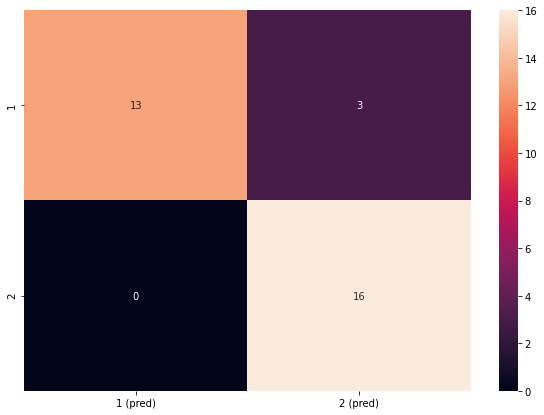

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sea
# 1=unhappy, 2=happy

confusion_matrix = confusion_matrix(y_test, y_pred)
conmat_df = pd.DataFrame(confusion_matrix,
                         index=[i for i in [1,2]],
                         columns = [j for j in ['1 (pred)', '2 (pred)']])
plt.figure(figsize=(10,7))
sea.heatmap(conmat_df,annot=True)

In [ ]:
def showHappy(model1):
  cd = createDict(0)
  user_df=pd.DataFrame(cd)
  user_pred=model1.predict(user_df)

  for i in range(len(user_pred)):
    if user_pred[i]==1:
      return "Unhappy :("
    else:
      return "Happy :)"


In [ ]:
showHappy(model1)

Enter a GDP value: 1.2
Enter a Social Support score: 1
Enter a Health Life Expectancy score: 0.88


'Unhappy :('



---


# **Objective Two: Predicting Happiness Scores** 



---


Now we'll work on some prediction using the data.



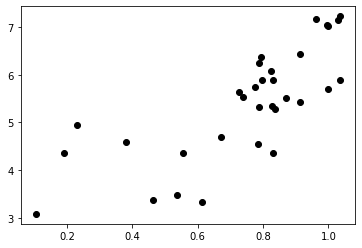

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression #, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm 

x1 = happy_df[['Health']]
y = happy_df[['Score']]
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, train_size=0.8)
plt.scatter(x1_test,y_test,color='black')

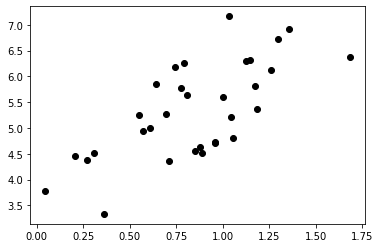

In [ ]:
x2 = happy_df[['GDP']]
y = happy_df[['Score']]
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, train_size=0.8)
plt.scatter(x2_test, y_test,color='black')

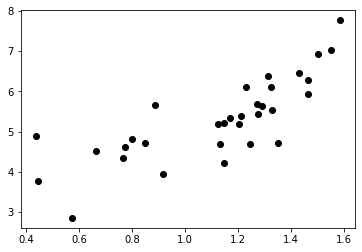

In [ ]:
x3 = happy_df[['SocialSupport']]
y = happy_df[['Score']]
x3_train, x3_test, y_train, y_test = train_test_split(x3, y, train_size=0.8)
plt.scatter(x3_test, y_test,color='black')

In [ ]:
x4 = happy_df[['Freedom']]
y = happy_df[['Score']]
x4_train, x4_test, y_train, y_test = train_test_split(x4, y, train_size=0.8)
plt.scatter(x4_test, y_test,color='black')

In [ ]:
#linear regression and objective one dreaming about heroin
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error

x = happy_df[['GDP','SocialSupport','Health','Freedom']]
y = happy_df[['Score']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

lin = LinearRegression()
lin.fit(x_train,y_train)
linPred = lin.predict(x_test)

In [ ]:
print(x_test[0:10])
print(y_test[0:10])
print(linPred[0:10])

linErr = mean_squared_error(linPred, y_test)
print(linErr)

print(lin.intercept_)
lin.coef_

       GDP  SocialSupport  Health  Freedom
118  0.380          0.829   0.375    0.332
76   1.438          1.277   1.122    0.440
52   1.050          1.409   0.828    0.557
32   1.004          1.439   0.802    0.390
36   1.294          1.488   1.039    0.231
41   0.745          1.529   0.756    0.631
15   1.333          1.538   0.996    0.450
110  0.657          1.247   0.672    0.225
54   1.301          1.219   1.036    0.159
147  0.323          0.688   0.449    0.026
     Score
118  4.534
76   5.430
52   6.008
32   6.300
36   6.223
41   6.174
15   7.054
110  4.696
54   5.895
147  3.597
[[4.11269785]
 [6.42070726]
 [6.15120123]
 [5.81593247]
 [6.06243719]
 [6.09183353]
 [6.49838836]
 [4.89759353]
 [5.64914036]
 [3.44080135]]
0.18263718454677041
[1.93124747]


array([[0.80261627, 1.06034126, 1.05492727, 1.81275776]])

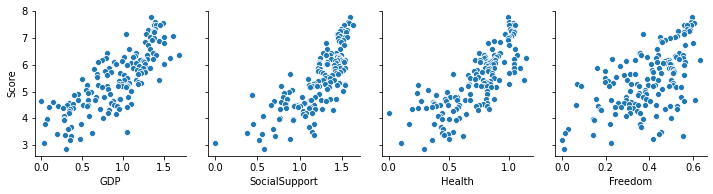

In [ ]:
import seaborn as sea
sea.pairplot(data=happy_df[['Score','GDP','SocialSupport','Health', 'Freedom']],
             x_vars=['GDP','SocialSupport','Health','Freedom'],
             y_vars=['Score']) 



In [ ]:
def createDict(num): 
  dictofscores = dict()
  for i in range(4):
    if i == 0:
      dictofscores["GDP"] = [float(input("Enter a GDP value: "))]
    elif i == 1:
      dictofscores["SocialSupport"] = [float(input("Enter a Social Support score: "))]
    elif i == 2:
      dictofscores["Health"] = [float(input("Enter a Health Life Expectancy score: "))]
    elif i == 3: 
      if num == 1:
        dictofscores["Freedom"] = [float(input("Enter a Freedom score: "))]

  return dictofscores

In [ ]:
def predictHappy(x,y, dictofscores):
  req_df = pd.DataFrame(dictofscores)
  x = happy_df[['GDP','SocialSupport','Health','Freedom']]
  y = happy_df[['Score']]

  x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

  lin = LinearRegression()
  lin.fit(x_train,y_train)
  

  return lin.predict(req_df)[0][0]



In [ ]:
x = happy_df[['GDP','SocialSupport','Health','Freedom']]
y = happy_df[['Score']]

diction = createDict(1)
predictHappy(x,y,diction)

print("Your happiness score was {}".format(predictHappy(x,y,diction)))

Enter a GDP value: 0.8
Enter a Social Support score: 1.5
Enter a Health Life Expectancy score: 1
Enter a Freedom score: 0.3
Your happiness score was 5.762606967622132


# Objective Three: Recommend a Country

In [ ]:
from sklearn.neighbors import NearestNeighbors as nn

def countryRec(test):
  X = happy_df[['SocialSupport','Freedom','GDP']]
  nbhd = nn(metric='cosine',n_neighbors=20).fit(X) 

  print("You should visit", happy_df.iloc[nbhd.kneighbors([test])[1][0][0]]['Country'])
  print("Social Support Score:", happy_df.iloc[nbhd.kneighbors([test])[1][0][0]]['SocialSupport'])
  print("Freedom Score:", happy_df.iloc[nbhd.kneighbors([test])[1][0][0]]['Freedom'])
  print("GDP Score:", happy_df.iloc[nbhd.kneighbors([test])[1][0][0]]['GDP'])

In [ ]:
def createList():
  req_list = list()

  for i in range(3):
    if i == 0:
      soc = float(input("Enter the minimum Social Support score you'd like your next travel destination to have: "))
      req_list.append(soc)
    elif i == 1:
      free = float(input("Enter the minimum Freedom score you'd like your next travel destination to have: "))
      req_list.append(free)
    elif i == 2:
      gdp = float(input("Enter the minimum GDP score you'd like your next travel destination to have: "))
      req_list.append(gdp)
  return req_list

In [ ]:
countryRec(createList())

Enter the minimum Social Support score you'd like your next travel destination to have: 1.44
Enter the minimum Freedom score you'd like your next travel destination to have: 0.4
Enter the minimum GDP score you'd like your next travel destination to have: 1.14
You should visit Kazakhstan
Social Support Score: 1.508
Freedom Score: 0.41
GDP Score: 1.173
